In [28]:
# Tres importante! Use venv_reliability to run les codes!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import tikzplotlib

from sklearn.mixture import GaussianMixture

from reliability.Fitters import *
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import histogram

In [86]:
# Load data
data_fname = "../data/combined_data_without_outliers.csv"
data = pd.read_csv(data_fname)

In [87]:
breed_popul = []
for breed_i in data["Breed"].unique():
    #print(breed_i)
    dat = data.loc[data["Breed"] == breed_i]
    ni = dat.shape[0]
    breed_popul += [ni]

breed_popul = np.sort(breed_popul)

In [88]:
breed_popul = -np.sort(-breed_popul)
print(breed_popul)

[378759 350948 326257 298945 189264 110835  98788  88820  30278  21873
  19186  16594  12791  11380  10836   8903   6361   4003   3090   2900
   2687   2362   2103   1881   1788   1629   1599   1394   1052    769
    714    582    323    309    308    283    254    249    231    205
    167    166    131    119    115    112    110    109    108    103
    103     92     83     78     71     69     68     57     55     46
     33     26     21     21     21     18     16     13     13     12
     12     11      8      7      6      6      5      5      2      2
      2      1      1      1      1      1      1      1      1      1
      1      1]


In [89]:
np.sum(breed_popul)

2013766

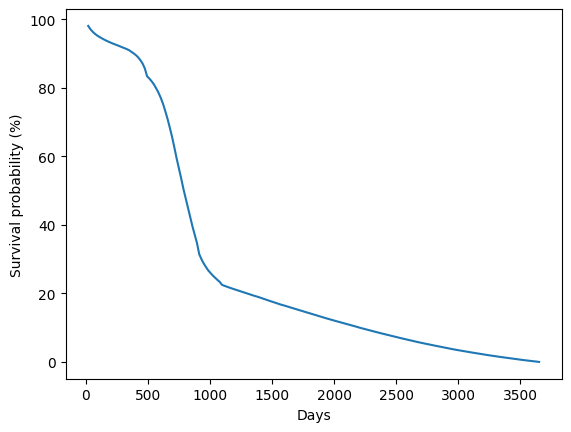

In [3]:
# Compute error [Total variation distance between estimated Weibull and empirical distribution]
Hall, X1all = np.histogram(data["days_alive"].to_numpy(), bins=200, density=True)
dx = X1all[1] - X1all[0]
F1all = np.cumsum(Hall)*dx



plt.plot(X1all[1:], 100*(1-F1all))
plt.xlabel('Days')
plt.ylabel('Survival probability (%)')


import tikzplotlib
tikzplotlib.save("images/overall_survival.tex")

plt.show()

In [36]:
data.columns

Index(['Herd_Id', 'Year', 'Dvo_Code', 'Month', 'Animal_Id', 'Abbatoir', 'Breed', 'Sex', 'Dob', 'Dod', 'Abattoir_._Died_on_Farm', 'Beef_or_Dairy', 'Total_Conditions_per_Animal', 'status',
       'days_alive', 'months_alive', 'years_alive', 'T_2M', 'RH2M', 'AvgOftotal_animals', 'No', 'PLEUR.PNEUMONIA.LOCAL', 'OEDEMA', 'NEPHRITIS', 'NAD', 'CONTAMINATION', 'TB.GENERALISED', 'TB',
       'ABSCESS.PYAEMIA', 'FLUKE.DAMAGE', 'HYDRONEPHROSIS', 'PLEUR.PNEUMONIA.GENERAL', 'PETECHAE.HAEMORRHAGES', 'INJECTION.SITES', 'PERITONITIS', 'PLEURISY', 'FACTORY.DAMAGE', 'PERICARDITIS',
       'BRUISING', 'SCAR.TISSUE', 'TELANGECTASIS', 'RESIDUES', 'ARTHRITIS', 'FASCIOLIASIS', 'ACTINO'],
      dtype='object')

0.15663135775318382

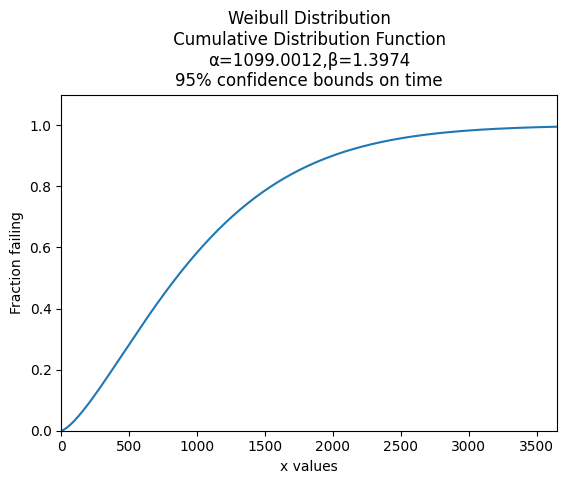

In [63]:
Hall, X1all = np.histogram(some_data, bins=200, density=True)
dx = X1all[1] - X1all[0]
F1all = np.cumsum(Hall)*dx

some_data = data["days_alive"].to_numpy() 
results = Fit_Weibull_2P(failures=some_data,show_probability_plot=False, print_results=False)
cdf_weib = results.distribution.CDF(xvals=X1all)
# plt.plot(xs, cdf_weib)

np.amax(np.abs(F1all - cdf_weib[1:]))

In [29]:
def tikzplotlib_fix_ncols(obj):
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

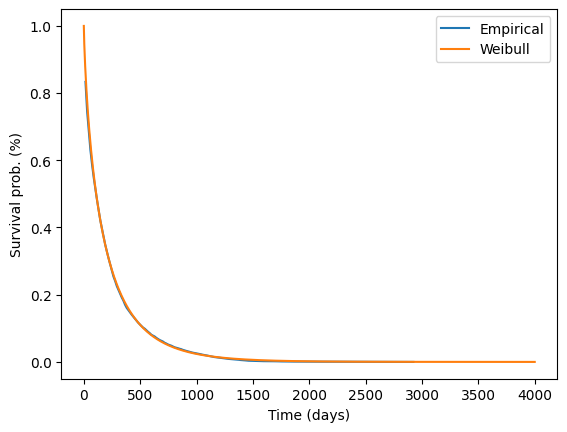

In [49]:
fig = plt.figure()
plt.plot(X1all[1:], 1-F1all, label='Empirical')
plt.plot(xs, 1-cdf_weib, label='Weibull')
plt.xlabel('Time (days)')
plt.ylabel('Survival prob. (%)')
plt.legend()


tikzplotlib_fix_ncols(fig)
tikzplotlib.save("images/best_weibull.tex")

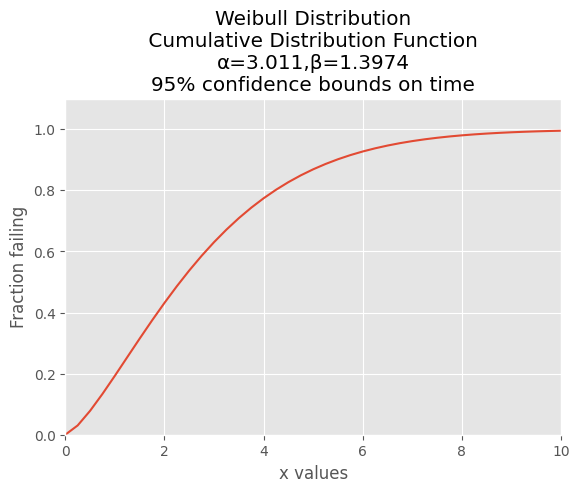

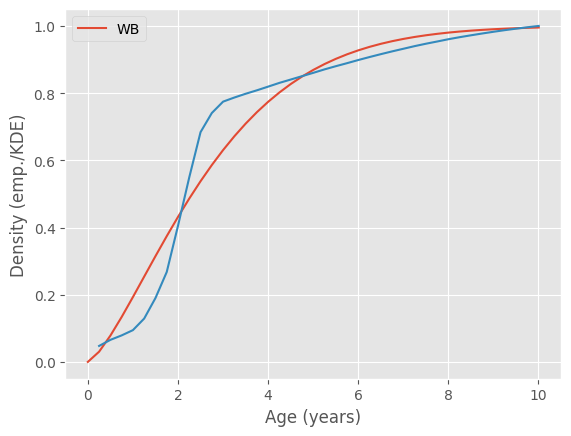

TV = 15.490003069491753% 


In [86]:
def tv(some_data, doplot):
    # Compute error [Total variation distance between estimated Weibull and empirical distribution]
    H, X1 = np.histogram(some_data, bins=40, density=True)
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    num_comp = 1
    
    results= Fit_Weibull_2P(failures=some_data,show_probability_plot=False, print_results=False)
    cdf_weib = results.distribution.CDF(xvals=X1)
    plt.show()
    
    if doplot:
        plt.plot(X1, cdf_weib, label=f"WB")
        plt.plot(X1[1:], F1)
        plt.legend()
        plt.xlabel('Age (years)')
        plt.ylabel('Density (emp./KDE)')
        plt.show()
    
    ## Compare (x1, f1) with (x_plot, y)
    tv_error = np.amax(np.abs(F1 - cdf_weib[1:]))
    print(f"TV = {100*tv_error}% ")


some_data = data["days_alive"].to_numpy() / 365
tv(some_data, True)
    
# for dv in data["Dvo_Code"].unique():
#     print(dv)
#     some_data = data[(
#              (data["Dvo_Code"] == dv) 
#              & (data["Sex"] == "M") 
#              # & (data["Beef_or_Dairy"] == "Dairy")
#              # & (data["Abattoir_._Died_on_Farm"] == "Died on Farm")
#              # & (data["Total_Conditions_per_Animal"] == 0)
#                                   )]["days_alive"].to_numpy() / 365
#     tv(some_data, True)

DVO: Newry


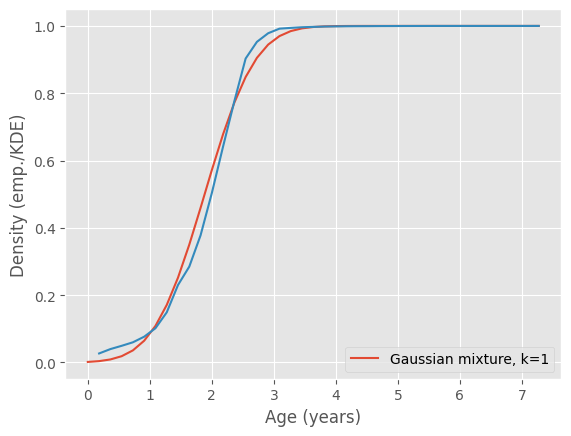

TV = 5.490023733309846% (i.e., by taking a Weibull this is max. error in )
DVO: Dungannon


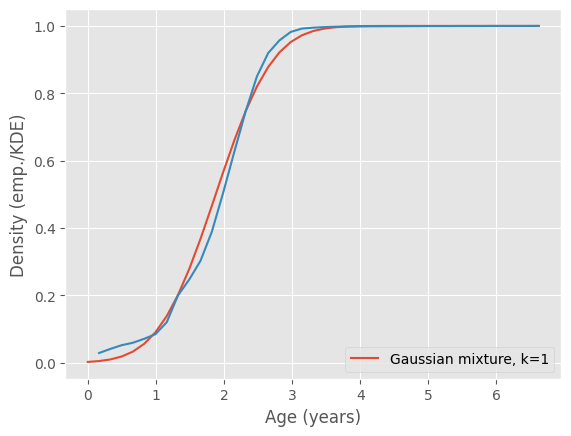

TV = 4.136753355944323% (i.e., by taking a Weibull this is max. error in )
DVO: Nt'Ards


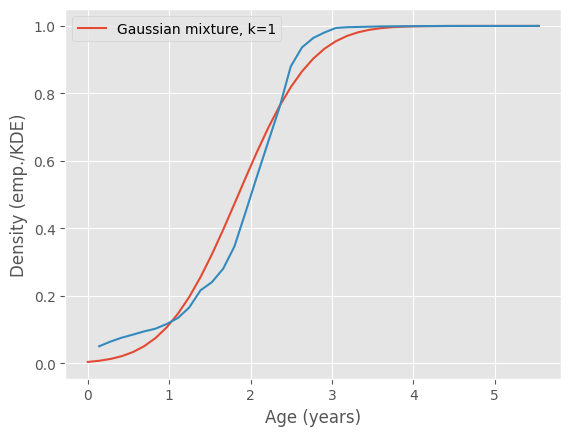

TV = 7.1046152755631535% (i.e., by taking a Weibull this is max. error in )
DVO: Enniskillen


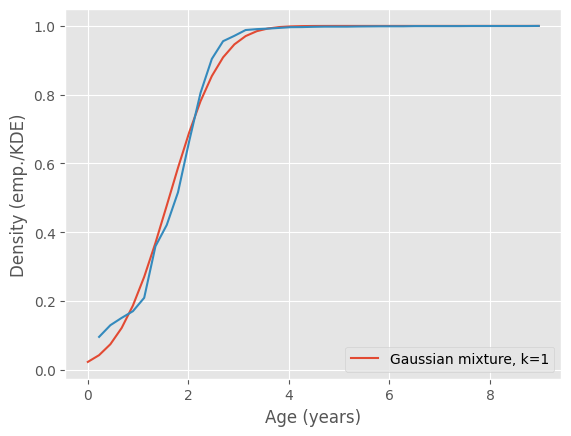

TV = 5.536292968887049% (i.e., by taking a Weibull this is max. error in )
DVO: Coleraine


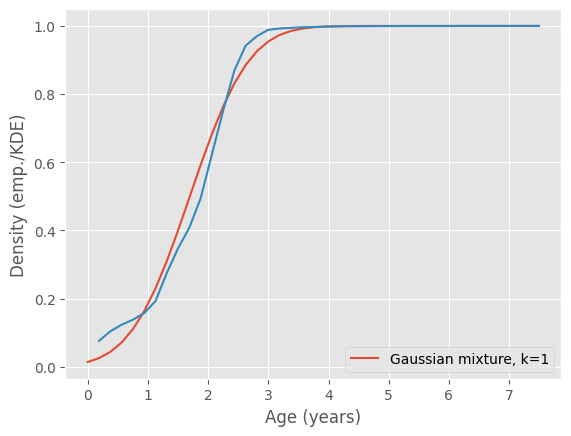

TV = 6.045426862243343% (i.e., by taking a Weibull this is max. error in )
DVO: Omagh


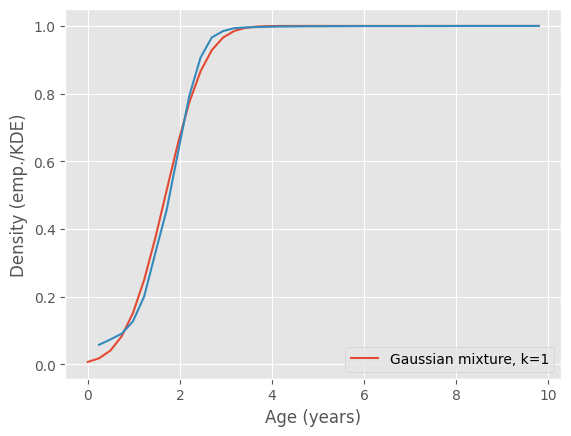

TV = 4.038018555184153% (i.e., by taking a Weibull this is max. error in )
DVO: Armagh


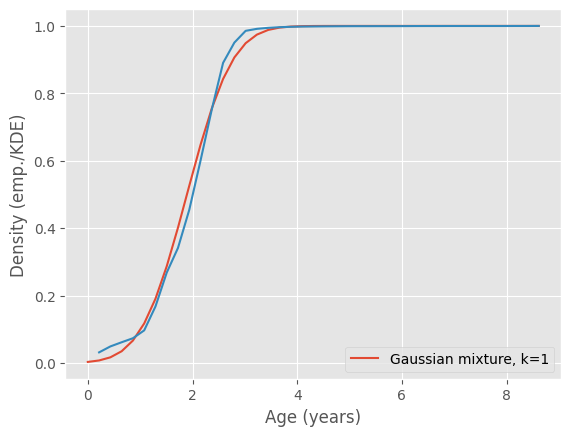

TV = 4.770378227611605% (i.e., by taking a Weibull this is max. error in )
DVO: Ballymena


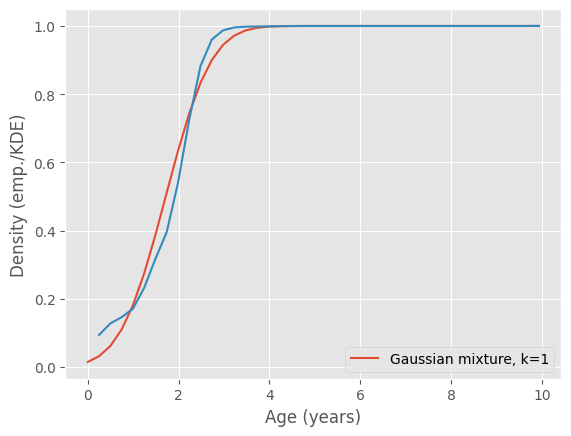

TV = 6.615739638108317% (i.e., by taking a Weibull this is max. error in )
DVO: Mallusk


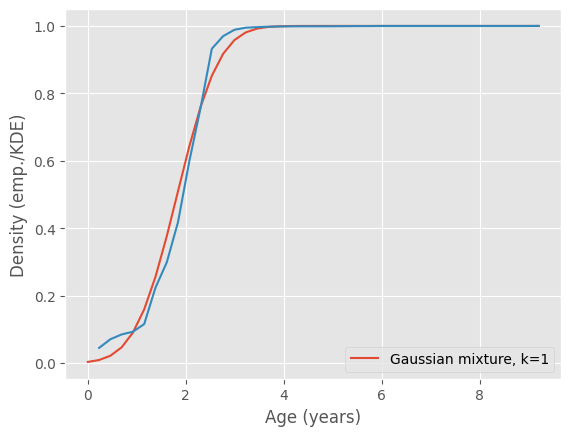

TV = 8.007850449596287% (i.e., by taking a Weibull this is max. error in )
DVO: LondonDerry


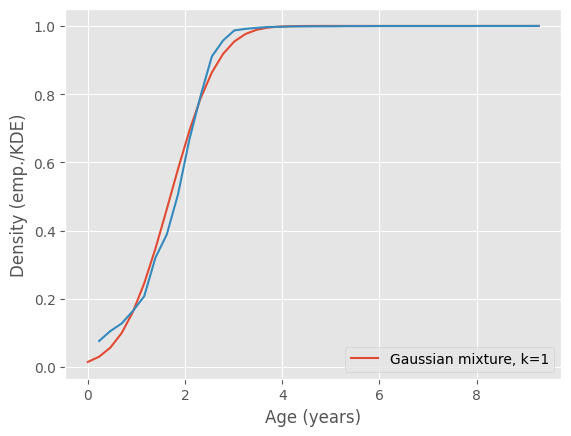

TV = 4.861378871245433% (i.e., by taking a Weibull this is max. error in )


In [37]:
for dv in data["Dvo_Code"].unique():
    some_data = data[(
         (data["Dvo_Code"] == dv) 
         & (data["Sex"] == "M") 
         # & (data["Beef_or_Dairy"] == "Dairy")
         # & (data["Abattoir_._Died_on_Farm"] == "Abattoir")
         # & (data["Total_Conditions_per_Animal"] >= 3)
                              )]["days_alive"].to_numpy().reshape(-1, 1) / 365
    print(f"DVO: {dv}")
    tv(some_data, False)